In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import scipy.ndimage
plt.rcParams['figure.figsize'] = [15, 15]

# 1. Import and plot an image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


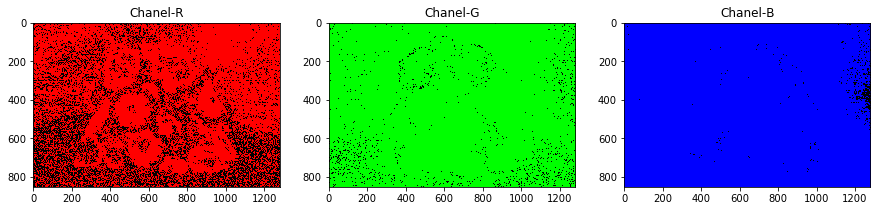

In [16]:
# Insert your code here:
im = plt.imread("data/coral.jpg")
im.shape

maskR = np.zeros(im.shape)
maskR[:,:,0] = 1
plt.subplot(1,3,1)
plt.title("Chanel-R")
plt.imshow(maskR*im)

maskG = np.zeros(im.shape)
maskG[:,:,1] = 1
plt.subplot(1,3,2)
plt.title("Chanel-G")
plt.imshow(im*maskG)


maskB = np.zeros(im.shape)
maskB[:,:,2] = 1
plt.subplot(1,3,3)
plt.title("Chanel-B")
plt.imshow(im*maskB)

# 2. Convolution

### 2a) Commutative property

$ h* f[x]= \sum_{i=0}^{N-1} h[i] f[x-i] $

Let, l = x-i, then, i = x-l.
When i=0, l = x, and when i = N-1, l = x-(N-1) 

$ h* f[x]= \sum_{l=x}^{x-(N-1)} h[x-l] f[l] $

Now, Since any sum over all N items is equivalent to 0 to N-1

$ h* f[x]= \sum_{l=0}^{N-1} f[l] h[x-l] $

Hence,

$ h * f[x] = f * h[x] $

### 2b) Boundary conditions

f[x]=[1,1,0,0,1,0,1,0,0], dim=1*9
h[x]=[-1,0,1], dim=1*3

valid convolution = [-1,-1,1,0,0,0,-1], dim=[1-1+1,9-3+1] i.e. 1*7

Valid convolution is the convolution in while we do not add any padding. The result of convolution with the zero padding is the same as valid convolution result given above.


### 2c) Implementation
Use the code-block below to test if your implementation of the `conv_2D()` function in `filters.py` is correct.

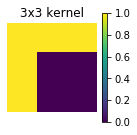

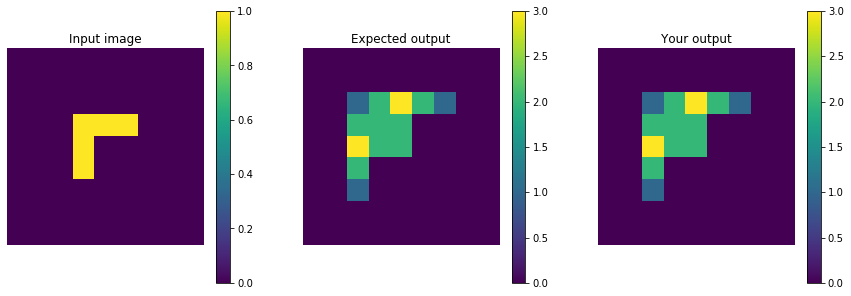

Your solution is correct!


In [17]:
from filters import conv_2D

kernel = np.array(
[
    [1,1,1],
    [1,0,0],
    [1,0,0]
])

# Create a test image
test_img = np.zeros((9, 9))
test_img[3:4, 3:6] = 1
test_img[3:6, 3:4] = 1

# Build the expected output
expected_output = scipy.ndimage.convolve(test_img, kernel)

# Plot the kernel
plt.figure(figsize=(2,2))
img =  plt.imshow(kernel)
plt.title('3x3 kernel')
plt.colorbar(img)
plt.axis('off')

# Plot the test image
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
img = plt.imshow(test_img)
plt.colorbar(img)
plt.title('Input image')
plt.axis('off')

# Plot the exepected output
plt.subplot(1,3,2)
img = plt.imshow(expected_output)
plt.colorbar(img)
plt.title('Expected output')
plt.axis('off')

# Plot your computed output
your_output = conv_2D(test_img, kernel)
plt.subplot(1,3,3)
img = plt.imshow(your_output)
plt.colorbar(img)
plt.title('Your output')
plt.axis('off')

plt.show()

if np.allclose(your_output, expected_output):
    print("Your solution is correct!")
else:
    print("Your solution is NOT correct!")

### 2d) Separable kernels

Input image = (100,800,800)
kernel = (9,25,25)
Output = (100-9+1,800-25+1,800-25+1)
       = (92,776,776)

Naive 3d convolution:
No. of addition and multiplication
      $= 9 * 25 * 25 * 92 * 776 * 776 $
      $= 311626080000 $

# 3. Scharr Filter and Edge Detection

### 3a) 

float64 (250, 250) 1.0 0.0


array([[0.42857143, 0.43915344, 0.48148148, ..., 0.41798942, 0.46560847,
        0.42857143],
       [0.3968254 , 0.41798942, 0.46031746, ..., 0.44444444, 0.47089947,
        0.43915344],
       [0.42857143, 0.4021164 , 0.30687831, ..., 0.48148148, 0.50793651,
        0.46560847],
       ...,
       [0.46560847, 0.43386243, 0.46560847, ..., 0.6031746 , 0.58730159,
        0.56613757],
       [0.40740741, 0.4973545 , 0.41798942, ..., 0.56084656, 0.66666667,
        0.65079365],
       [0.42328042, 0.45502646, 0.51322751, ..., 0.61904762, 0.76190476,
        0.73015873]])

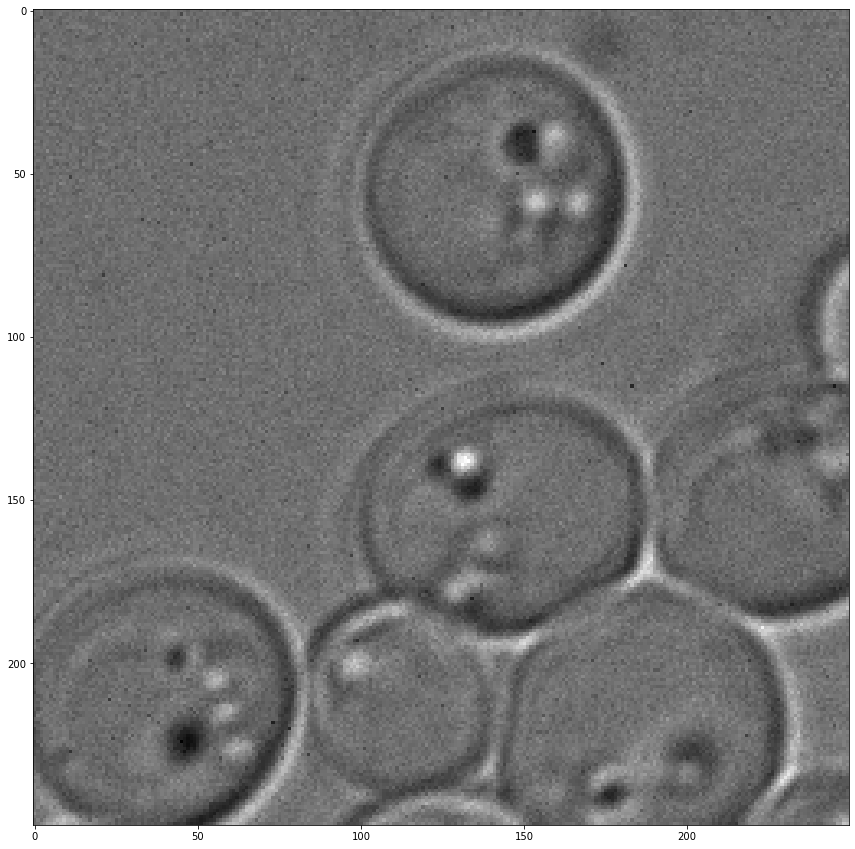

In [41]:
# Insert your code here
im = plt.imread("data/yeast_cells_cropped.tif")
plt.imshow(im,cmap="gray")
max, min = im.max(), im.min()
im = (im-min)/(max-min)
print(im.dtype,im.shape,im.max(),im.min())
im

### 3b) 

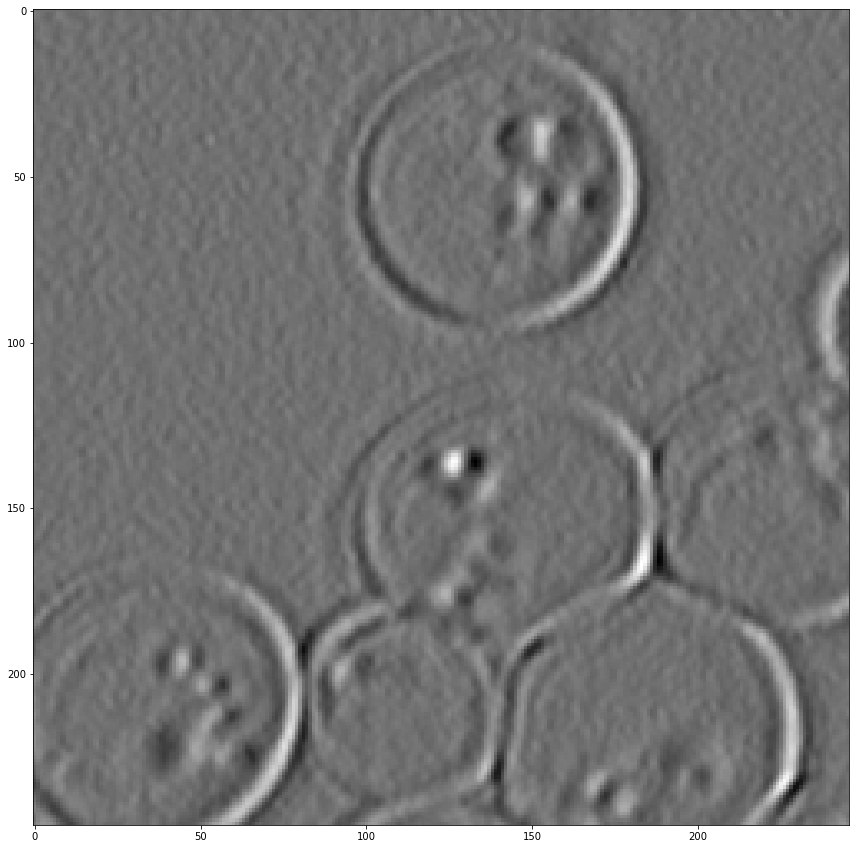

In [42]:
# Insert your code here

from filters import conv_1D

filter_row = np.array([1,0,-1])
filter_col = np.array([3,10,3])

out_ = conv_1D(im,filter_row)
out_ = conv_1D(out_.transpose(),filter_col)
out = out_.transpose()
out = (out - out.min())/(out.max()-out.min())*255

plt.imshow(out,cmap="gray")
plt.show()

### 3c) 

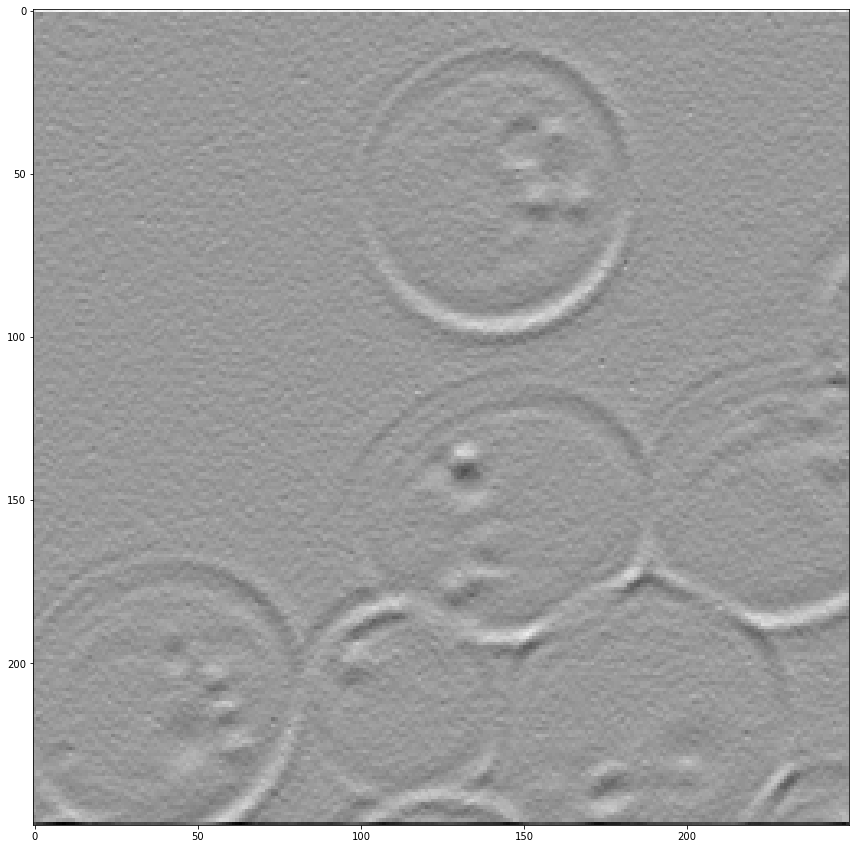

In [43]:
# Insert your code here
scharr_x = np.array([[3,0,-3],[10,0,-10],[3,0,-3]])
scharr_y = np.array([[3,10,3],[0,0,0],[-3,-10,-3]])

out = conv_2D(im,scharr_y)
out = (out - out.min())/(out.max()-out.min())*255

plt.imshow(out,cmap="gray")
plt.show()

### 3d) 

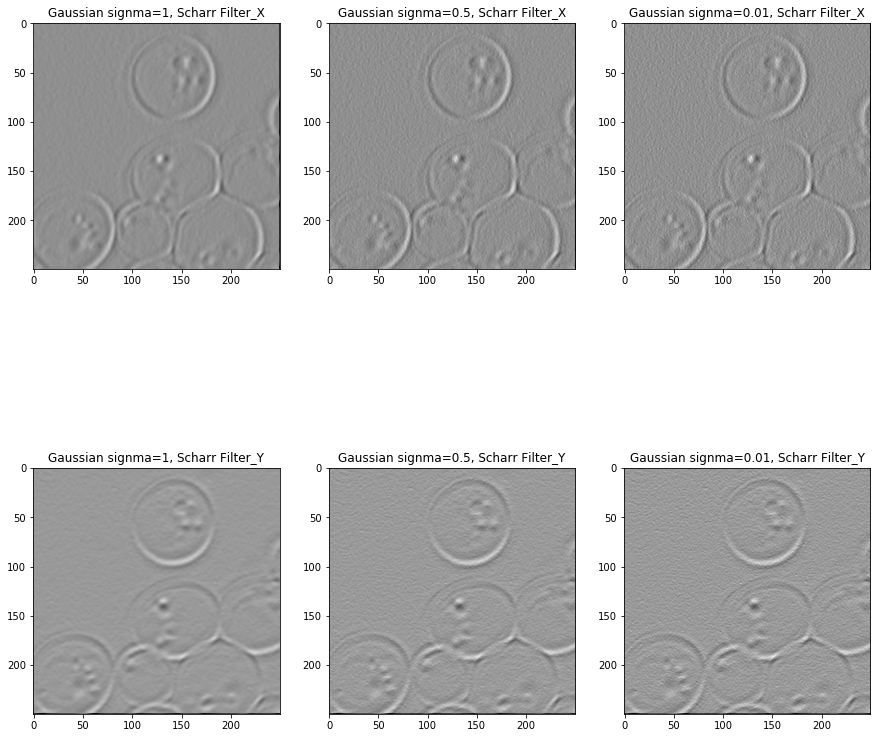

COMMENTS: the smaller the sigma, the sharper the edges


In [44]:
# Insert your code here

from scipy.ndimage import gaussian_filter
from filters import rescale

im_1 = gaussian_filter(im, sigma=1)
im_05 = gaussian_filter(im, sigma=0.5)
im_001 = gaussian_filter(im, sigma=0.01)

out_ = conv_2D(im_1,scharr_x)
out = rescale(out_)*255
plt.subplot(2,3,1)
plt.imshow(out,cmap="gray")
plt.title("Gaussian signma=1, Scharr Filter_X")

out_ = conv_2D(im_05,scharr_x)
out = rescale(out_)*255
plt.subplot(2,3,2)
plt.imshow(out,cmap="gray")
plt.title("Gaussian signma=0.5, Scharr Filter_X")

out_ = conv_2D(im_001,scharr_x)
out = rescale(out_)*255
plt.subplot(2,3,3)
plt.imshow(out,cmap="gray")
plt.title("Gaussian signma=0.01, Scharr Filter_X")

out_ = conv_2D(im_1,scharr_y)
out = rescale(out_)*255
plt.subplot(2,3,4)
plt.imshow(out,cmap="gray")
plt.title("Gaussian signma=1, Scharr Filter_Y")

out_ = conv_2D(im_05,scharr_y)
out = rescale(out_)*255
plt.subplot(2,3,5)
plt.imshow(out,cmap="gray")
plt.title("Gaussian signma=0.5, Scharr Filter_Y")

out_ = conv_2D(im_001,scharr_y)
out = rescale(out_)*255
plt.subplot(2,3,6)
plt.imshow(out,cmap="gray")
plt.title("Gaussian signma=0.01, Scharr Filter_Y")

plt.show()

print("COMMENTS: the smaller the sigma, the sharper the edges")

# 4. Bonus: Segmentation of Yeast Cells

### 4a) 

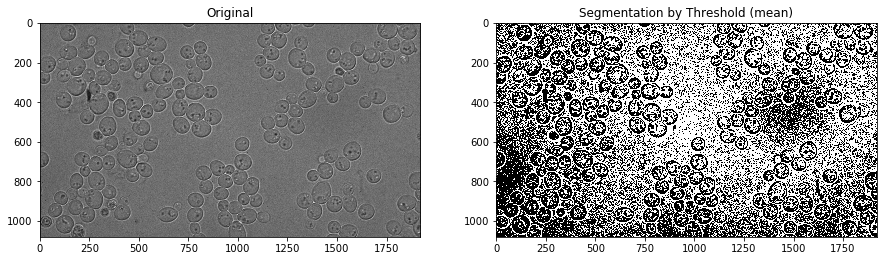

COMMENTS: It is difficult to obtain a good segmentation using thresh-value method because 1) the inside of the yeast cell is not uniform; 2) the background colors have variations in different regions; 3) there is no strong contrast between the yeast cells and the background, as they share a set of similar colors and intensities.


In [45]:
# Insert your code here
im = plt.imread("C:\\Users\Claire\Documents\Project Heidelberg\Learning\SS2020\CVF\ex01\ex01\data\yeast_cells.tif")
plt.subplot(1,2,1)
plt.imshow(im,cmap="gray")
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(im>im.mean(),cmap="gray")
plt.title("Segmentation by Threshold (mean)")

plt.show()
print("COMMENTS: It is difficult to obtain a good segmentation using thresh-value method because 1) the inside of the yeast cell is not uniform; 2) the background colors have variations in different regions; 3) there is no strong contrast between the yeast cells and the background, as they share a set of similar colors and intensities.")

### 4b) 

In [46]:
# Insert your code here
print("COMMENTS: We can probably apply the Laplace filter to the image to detect the edges around the yeast cells and then implement segmentation based on gradient difference...")

COMMENTS: We can probably apply the Laplace filter to the image to detect the edges around the yeast cells and then implement segmentation based on gradient difference...


### 4c) 

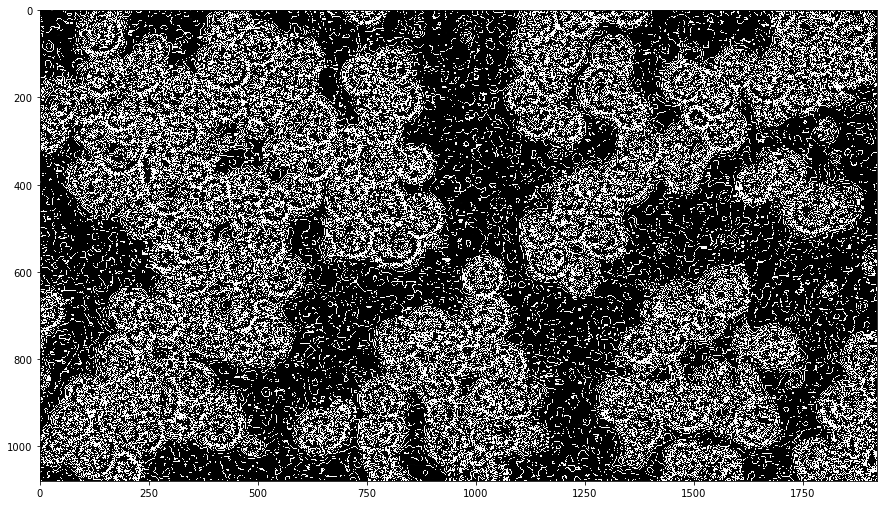

COMMENTS: By changing the sigma in the Gaussian filter to find the best result
COMMENTS: Not sure how to implement the gradient differentiation...


In [52]:
# Insert your code here

laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
im_ = gaussian_filter(im, sigma=5)

out_ = conv_2D(im_,laplace)
out = rescale(out_)

plt.imshow(out*255,cmap="gray")
plt.show()

print("COMMENTS: By changing the sigma in the Gaussian filter to find the best result")
print("COMMENTS: Not sure how to implement the gradient differentiation...")

# 5 Segmentation of Yeast Cells with ilastik

### 5c)

After labeling the first ten points:


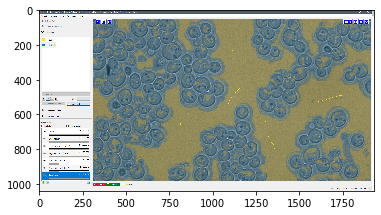

In [5]:
import matplotlib.pyplot as plt
print("After labeling the first ten points:")
im = plt.imread("data/before_active_learning.PNG")
plt.imshow(im)

After labeling the next ten points in active learning:


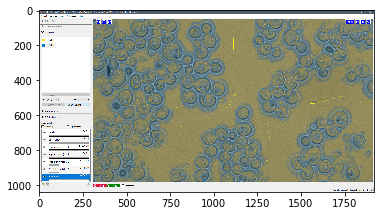

In [6]:
import matplotlib.pyplot as plt
print("After labeling the next ten points in active learning:")
im = plt.imread("data/after_active_learning.PNG")
plt.imshow(im)